In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list({ch for w in words for ch in w}))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [131]:
# build the dataset

block_size = 3 # context_length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words:
    
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [132]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [7]:
C = torch.randn((27, 2))

In [36]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [37]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [69]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [70]:
h.shape

torch.Size([32, 100])

In [72]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [85]:
logits = h @ W2 + b2

In [86]:
logits.shape

torch.Size([32, 27])

In [76]:
counts = logits.exp()

In [79]:
prob = counts / counts.sum(1, keepdims=True)

In [84]:
prob.shape

torch.Size([32, 27])

In [90]:
prob[0]

tensor([1.1523e-07, 2.1078e-07, 5.6146e-09, 1.8030e-16, 5.7856e-07, 1.4289e-08,
        9.3003e-13, 3.3187e-05, 1.5750e-01, 2.0782e-13, 8.0815e-11, 3.6969e-06,
        7.5109e-04, 2.3821e-06, 8.3872e-01, 1.0040e-06, 5.6304e-10, 2.9533e-08,
        4.0511e-04, 6.4319e-14, 2.4099e-03, 6.4143e-12, 1.7023e-10, 2.4156e-06,
        3.7785e-10, 2.7917e-14, 1.7247e-04])

In [95]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.4410)

In [96]:
# ---------------- Cleaning up the above code --------------

In [133]:
X.shape, Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [198]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [135]:
sum(p.nelement() for p in parameters) # num of param in total

3481

In [199]:
for p in parameters:
    p.requires_grad = True

In [194]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [200]:
lri = []
lossi = []

for i in range(1000):   
    # minibatch
    ix = torch.randint(0, X.shape[0], (32, ))
    
    # Forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    
    print(loss.item()) # This is only the minibatch loss
    
    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
    
#print(loss.item()) # This is only the minibatch loss

18.353212356567383
19.864582061767578
22.535242080688477
17.774917602539062
17.790868759155273
20.021438598632812
17.92754554748535
20.390047073364258
20.225080490112305
14.524961471557617
20.259275436401367
23.200969696044922
18.857542037963867
18.48134422302246
18.257495880126953
17.80535316467285
18.31694221496582
19.08545684814453
18.642215728759766
17.708038330078125
20.68975830078125
19.73548698425293
16.62900733947754
19.87027931213379
16.800500869750977
18.123865127563477
19.627164840698242
19.104814529418945
17.535661697387695
19.987518310546875
17.347131729125977
18.322734832763672
19.20294952392578
19.3293514251709
17.19654655456543
20.804685592651367
17.958417892456055
16.8979434967041
16.232271194458008
20.794363021850586
18.9774112701416
19.332334518432617
20.688011169433594
16.24292755126953
18.275745391845703
17.463359832763672
20.058692932128906
20.11790657043457
19.28392791748047
16.550981521606445
21.314836502075195
19.054141998291016
17.4254093170166
17.774290084838

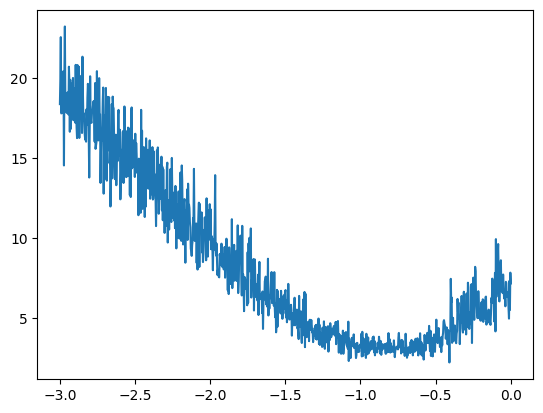

In [201]:
plt.plot(lri, lossi)

In [166]:
# Loss over all examples
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.5764243602752686
